
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Tuesday, October 2nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [1]:
import numpy as np
import pandas as pd

data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

(a) (5pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

(b) (5pts) Fit polynomial models of degrees 1,2,3 and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

(c) (5pts) Which model performed the best? Explain using the bias-variance tradeoff.

#### a.) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

Mean Squared Error on the test data is -  6455.708453830031


Text(0,0.5,"Outputs (Y's)")

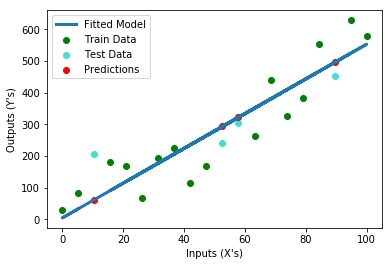

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

# Fitting liear model on training data
clf = linear_model.LinearRegression()
clf.fit(x_train, y_train)

# Predicting and mean squared error on the test data
y_predicted = clf.predict(x_test)
y_predictd_train = clf.predict(x_train)
print ('Mean Squared Error on the test data is - ', mean_squared_error(y_test, y_predicted))

# Plotting the data, fitted model, predictions
plt.scatter(x_train,y_train,label="Train Data",color = 'green')
plt.scatter(x_test,y_test,label="Test Data",color = 'turquoise')
plt.plot(x_train,y_predictd_train,linewidth = 3,label = "Fitted Model")
plt.scatter(x_test,y_predicted,label = "Predictions",color = 'red')
plt.legend()
plt.xlabel("Inputs (X's)")
plt.ylabel("Outputs (Y's)")

#### b.) Fit polynomial models of degrees 1,2,3 and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
y_predicted_poly_train = []
y_predicted_poly_test = []
mse = []
def polynomial_models(deg):
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(x_train)
    X_test_poly = poly.fit_transform(x_test)
    clf = linear_model.LinearRegression()
    clf.fit(X_train_poly, y_train)
    y_predicted_poly_train.append(clf.predict(X_train_poly))
    y_predicted_poly_test.append(clf.predict(X_test_poly))
    mse.append(mean_squared_error(y_test, clf.predict(X_test_poly)))
    return mse

mse_poly1 = polynomial_models(1)
mse_poly2 = polynomial_models(2)
mse_poly3 = polynomial_models(3)
mse_poly5 = polynomial_models(5)

print ('Mean squared error on the test data for polynomial of degree 1 is: ', mse[0])
print ('Mean squared error on the test data for polynomial of degree 2 is: ', mse[1])
print ('Mean squared error on the test data for polynomial of degree 3 is: ', mse[2])
print ('Mean squared error on the test data for polynomial of degree 5 is: ', mse[3])

Mean squared error on the test data for polynomial of degree 1 is:  6455.70845383002
Mean squared error on the test data for polynomial of degree 2 is:  4683.309906329018
Mean squared error on the test data for polynomial of degree 3 is:  4602.202716053174
Mean squared error on the test data for polynomial of degree 5 is:  6599.133603518122


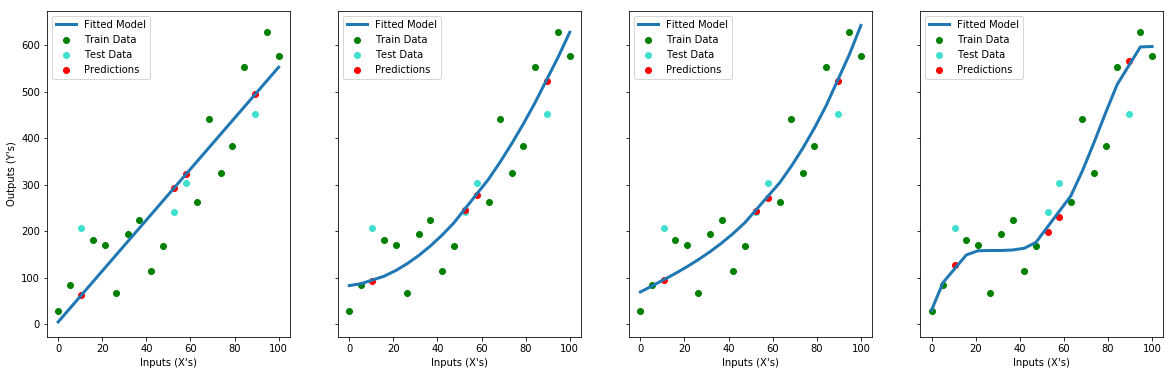

In [4]:
# Plotting the data, fitted model, predictions
fig, axes = plt.subplots(nrows=1, ncols=4,figsize = (20,6),sharey = True)
for i in range(4):
    axes[i].scatter(x_train,y_train,label="Train Data",color = 'green')
    axes[i].scatter(x_test,y_test,label="Test Data",color = 'turquoise')
    axes[i].scatter(x_test,y_predicted_poly_test[i],label = "Predictions",color = 'red')
    axes[i].plot(sorted(x_train),sorted(y_predicted_poly_train[i]),linewidth = 3,label = "Fitted Model")
    axes[i].set_xlabel("Inputs (X's)")
    axes[0].set_ylabel("Outputs (Y's)")
    
    axes[i].legend()
plt.show()

#### c.) Which model performed the best? Explain using the bias-variance tradeoff.

Clearly, based on the above MSE and graphs model with degree 3 performed the best, with MSE of 4602.2. As the degree of polynomial is increased the curve is trying to fit the training data better. This is in turn increasing the complexity of the model or increasing the variance. The model with 1 degree polynomial is the least complex model, while th one with 5 degrees is more complex. On the other hand, the model with 1 degree has higher bias while the one with higher degrees (which tend to fit the data better) has lower bias. So as we are increasing the degrees of polynomial, bias is decreasing but variance is increasing. Thus the model with best bias-variance trade off (degree 3 polynomial) has the lowest error rate.

# Question 1. Data Exploration (20pts)
Use the following code to import the dataset.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

(a) (1pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows.

(b) (4pts) Generate box-plots for each of the four columns and identify the cutoff values for outliers.

(c) (4pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

(d) (4pts) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

#### a) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows.

In [6]:
print (data.shape)
print(data.head())

(200, 4)
      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


#### b) Generate box-plots for each of the four columns and identify the cutoff values for outliers.

Text(0,0.5,'Thousand Widgets')

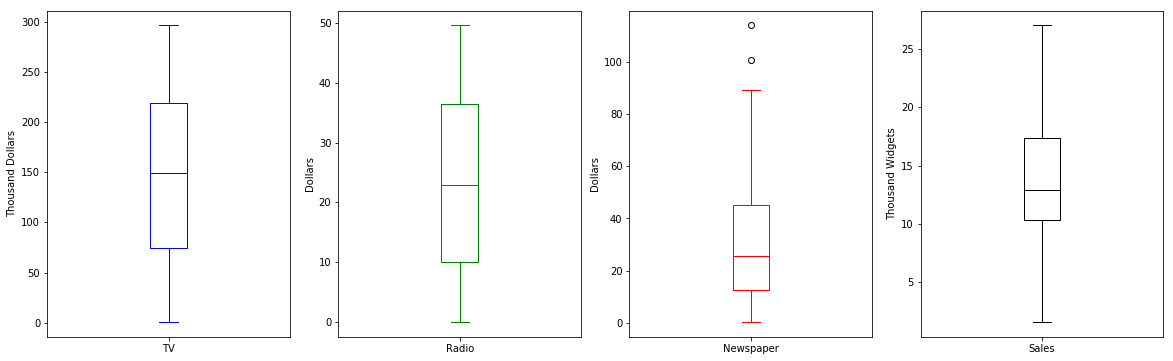

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=4,figsize = (20,6),sharey = False)
tv_boxplot = data['TV'].plot.box(color = 'blue',ax=ax[0])
ax[0].set_ylabel('Thousand Dollars')
radio_boxplot = data['Radio'].plot.box(color = 'green',ax=ax[1])
ax[1].set_ylabel('Dollars')
newspaper_boxplot = data['Newspaper'].plot.box(color = 'red',ax=ax[2])
ax[2].set_ylabel('Dollars')
sales_boxplot = data['Sales'].plot.box(color = 'black',ax=ax[3])
ax[3].set_ylabel('Thousand Widgets')

In [54]:
def cutoff_values(i):
    q75, q25 = np.percentile(data[i], [75 ,25])
    iqr = q75 - q25

    min = round(q25 - (iqr*1.5),2)
    max = round(q75 + (iqr*1.5),2)
    print('Outlier cutoff value of outiers for %s'%i,min, ',', max)

cutoff_values('TV')
cutoff_values('Radio')
cutoff_values('Newspaper')
cutoff_values('Sales')

Outlier cutoff value of outiers for TV -142.3 , 435.5
Outlier cutoff value of outiers for Radio -29.85 , 76.35
Outlier cutoff value of outiers for Newspaper -35.78 , 93.62
Outlier cutoff value of outiers for Sales -0.16 , 27.94


#### c) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

Based on the graphs below the relationship between the features and response variable (Sales) is linear. That is sales tend to increase linearly with tv, radio and newspaper.


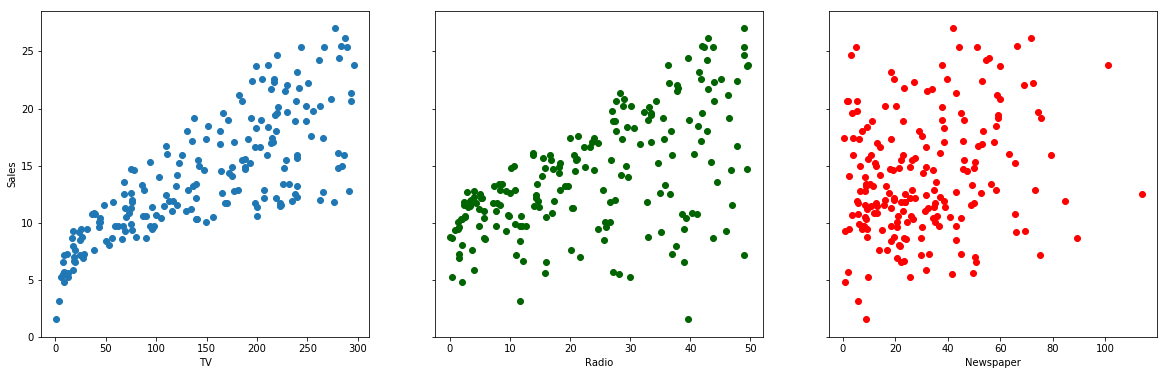

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize = (20,6),sharey = True)

ax[0].scatter(data['TV'],data['Sales'])
ax[0].set_xlabel('TV')
ax[0].set_ylabel('Sales')
ax[1].scatter(data['Radio'],data['Sales'],color = 'DarkGreen')
ax[1].set_xlabel('Radio')
ax[2].scatter(data['Newspaper'],data['Sales'],color = 'Red')
ax[2].set_xlabel('Newspaper')

print("Based on the graphs below the relationship between the features and response variable (Sales) is linear. \
That is sales tend to increase linearly with tv, radio and newspaper.")

#### d) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

In [9]:
X = np.array(data['TV']).reshape(-1,1)
Y = np.array(data['Sales']).reshape(-1,1)
clf = linear_model.LinearRegression()
result = clf.fit(X,Y)
print ('Regression coefficient for TV is: ', result.coef_[0][0])
print ('\nThe coeficient basically means that with every dollar increase in TV advertisement spend leads to an increase\
of 0.047 units of sales, provided all the other variables are constant. Or more clearly, every $100 increase\
in TV advertisement spend leads to an increase of 4.75 units in sales, provided all the other variables are constant.')

Regression coefficient for TV is:  0.047536640433019764

The coeficient basically means that with every dollar increase in TV advertisement spend leads to an increaseof 0.047 units of sales, provided all the other variables are constant. Or more clearly, every $100 increasein TV advertisement spend leads to an increase of 4.75 units in sales, provided all the other variables are constant.


Now split the data randomly into a training and test set (keep one third of the data for test), using train_test_split from sklearn. Use test_size as 0.33 and random_state as 42.

(e) (4pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. (Sales is the dependent variable)

(f) (2pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?

(g) (1pts) Report the coefficients obtained by your model.

#### e) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. (Sales is the dependent variable)

In [10]:
from sklearn.model_selection import train_test_split
Y = data['Sales']
X = data.drop(['Sales'],axis =1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33, random_state=42)
clf = linear_model.LinearRegression()
result = clf.fit(X_train,Y_train)
Y_test_predict = clf.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_predict))
print ('RMSE on the test data is: ', rmse_test)

RMSE on the test data is:  1.93078438223472


#### f)  Report the MSE obtained on train data. How much does this increase when you score your model on test data?

In [11]:
Y_train_predict = clf.predict(X_train)
mse_train = mean_squared_error(Y_train,Y_train_predict )
mse_test = mean_squared_error(Y_test, Y_test_predict)
percentage_increase_mse =(mse_test - mse_train)*100/mse_train
print ('MSE obtained on the train data is: ', mse_train)
print ('% increase in MSE when we score the model on test data is: ',percentage_increase_mse,'%')

MSE obtained on the train data is:  2.410858654557854
% increase in MSE when we score the model on test data is:  54.63072974575535 %


In [12]:
print('The coefficient for TV is: ',result.coef_[0])
print('The coefficient for Radio is: ',result.coef_[1])
print('The coefficient for Newspaper is: ',result.coef_[2])

The coefficient for TV is:  0.04466512063271282
The coefficient for Radio is:  0.1966300628262483
The coefficient for Newspaper is:  0.006074386547886876


# Question 2. Regression (25pts)

Use the following dataset for this question. Split the dataset into train and test set(already done for you.)


In [13]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state=10) 

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


a) (2 points) Fit an MLR, using ordinary least squares, on all the feature variables using the training data. Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

b)  (3 points) Now fit the regression model using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

Now we will introduce outlier in the training set and train our model to see how the model performs. (Code provided)

c) (2 points ) Fit the MLR model on X_train and y_train_outlier and calculate the RMSE on train and test set.

d) (3 points) Fit the regression model with Huber loss on X_train and y_train_outier. Calculate the RMSE on train and test set. Compare the RMSE of both the models.

e) (5 points) Calaculate the residuals on the test set for both the models obtained in (c) and (d). Plot the scatter plot of residual vs fitted value for both the models. What do you observe? Which model looks better?

#### a) Fit an MLR, using ordinary least squares, on all the feature variables using the training data. Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

In [15]:
clf = linear_model.LinearRegression()
result = clf.fit(X_train,y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
increased_rmse = rmse_test - rmse_train

print ('RMSE on train data is: ',rmse_train)
print ('RMSE on test data is: ',rmse_test)
print ('Increase in RMSE is: ', increased_rmse)

RMSE on train data is:  52.007732294217874
RMSE on test data is:  57.428059772853565
Increase in RMSE is:  5.420327478635691


#### b) Now fit the regression model using Huber loss. You can use the sklearn package. Set regularization parameter alpha to 0.0 and all other parameters as default. Report RMSE obtained on both X_train and X_test.

In [44]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(alpha = 0.0).fit(X_train,y_train)
y_train_predict_huber = huber.predict(X_train)
y_test_predict_huber = huber.predict(X_test)
rmse_train_huber = np.sqrt(mean_squared_error(y_train, y_train_predict_huber))
rmse_test_huber = np.sqrt(mean_squared_error(y_test, y_test_predict_huber))

print ('RMSE on train data using Huber loss is: ',rmse_train_huber)
print ('RMSE on test data using Huber loss is: ',rmse_test_huber)

RMSE on train data using Huber loss is:  52.16357275654772
RMSE on test data using Huber loss is:  57.15007488048903


#### c) Fit the MLR model on X_train and y_train_outlier and calculate the RMSE on train and test set.

In [17]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 5000.0

result_outliers = clf.fit(X_train,y_train_outliers)
y_train_predict_outliers = clf.predict(X_train)
y_test_predict_outliers = clf.predict(X_test)
rmse_train_outliers = np.sqrt(mean_squared_error(y_train_outliers, y_train_predict_outliers))
rmse_test_outliers = np.sqrt(mean_squared_error(y_test, y_test_predict_outliers))

print ('RMSE on train data with outliers is: ',rmse_train_outliers)
print ('RMSE on test data with outliers is: ',rmse_test_outliers)

RMSE on train data with outliers is:  286.2641030656008
RMSE on test data with outliers is:  82.21820407137496


#### d) Fit the regression model with Huber loss on X_train and y_train_outier. Calculate the RMSE on train and test set. Compare the RMSE of both the models.

In [45]:
huber_ouliers = HuberRegressor(alpha = 0.0).fit(X_train,y_train_outliers)
y_train_predict_huber_ouliers = huber_ouliers.predict(X_train)
y_test_predict_huber_ouliers = huber_ouliers.predict(X_test)
rmse_train_huber_ouliers = np.sqrt(mean_squared_error(y_train_outliers, y_train_predict_huber_ouliers))
rmse_test_huber_outliers = np.sqrt(mean_squared_error(y_test, y_test_predict_huber_ouliers))

print ('RMSE on train data with outliers using Huber loss is: ',rmse_train_huber_ouliers)
print ('RMSE on test data with outliers using Huber loss is: ',rmse_test_huber_outliers)

RMSE on train data with outliers using Huber loss is:  290.2226909607711
RMSE on test data with outliers using Huber loss is:  57.56522357131555


Interestingly, the RMSE on test data for Huber Regressor in the case of the data set with outliers is similar to the data set without outliers, suggesting it is robust to outliers. However the RMSE suddenly jumped for MLR with outiers data.

#### e) Calculate the residuals on the test set for both the models obtained in (c) and (d). Plot the scatter plot of residual vs fitted value for both the models. What do you observe? Which model looks better?

Text(0.5,1,'Residual vs Fitted for Huber Regressor')

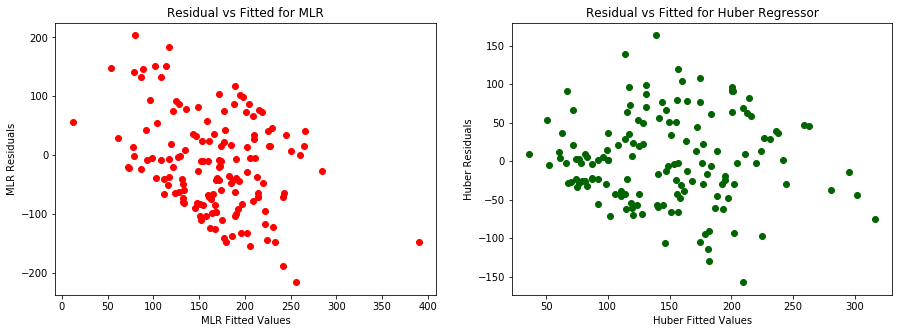

In [19]:
residuals_mlr = y_test - y_test_predict_outliers
residuals_huber = y_test - y_test_predict_huber_ouliers

fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (15,5),sharey = False)

ax[0].scatter(y_test_predict_outliers,residuals_mlr,color = 'Red')
ax[0].set_xlabel('MLR Fitted Values')
ax[0].set_ylabel('MLR Residuals')
ax[0].set_title('Residual vs Fitted for MLR')
ax[1].scatter(y_test_predict_huber_ouliers,residuals_huber,color = 'DarkGreen')
ax[1].set_xlabel('Huber Fitted Values')
ax[1].set_ylabel('Huber Residuals')
ax[1].set_title('Residual vs Fitted for Huber Regressor')

**Observations**: The residuals bounce randomly from the residual = 0 line, suggesting that the assumption that the relationship is linear is reasonable.

The huber model looks better as there are lesser deviations of the residuals from residual = 0 line than the deviations for Linear Regression Model. Clearly one of the residual for MLR at fitted value of ~ 400 seems to stand out. This is because there was an outlier in our training data. This shows that MLR is highly sensitive to outliers. For Huber model most of the points are near the residual = 0 line, with lesser deviations. Thus showing that Huber Regressor is less sensitive to outliers.

Now we will do feature selection. The features of X matrix are named as x1,x2,.... . We have created a list feature_name which stores the feature name (Code provided). So x1 means the first column of X, x2 means the second column of X and so on.

f) (5 points ) Backward Selection: Find the three most significant factors using backward feature selection. You may find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html. Use X_train and y_train for your model.

g) (5 points) Forward Selection: Find the three most significant feature using forward selection. Check if it is same as the ones you got in part (f). Use X_train and y_train for your model. Hint : Use a for loop to implement forward feature selection

#### f)  Backward Selection: Find the three most significant factors using backward feature selection

In [20]:
feature_name = ['x'+str(i) for i in range(1,11)]
from sklearn.feature_selection import RFE
clf = linear_model.LinearRegression()
# Selecting the top 3 features
selector = RFE(clf, 3, step=1)
selector = selector.fit(X_train, y_train)
selected_features=[]
j=0
for i in selector.support_:
    if i == True:
        selected_features.append(feature_name[j])
    j = j+1
    
print ('Top 3 features obtained from backward selection method are: ', selected_features)

Top 3 features obtained from backward selection method are:  ['x3', 'x5', 'x9']


#### g) Forward Selection: Find the three most significant feature using forward selection

In [21]:
clf = linear_model.LinearRegression()
top_features = 1
index_array=[]
top_feature_name = []

while top_features <=3:  
    rmse_forward = []
    for i in range(len(feature_name)):
        if top_features == 1:
            X_train_forward = X_train[:,i].reshape(-1,1)
        else:
            X_train_forward = X_train[:,[i] + index_array]
        clf.fit(X_train_forward,y_train)
        y_train_predict = clf.predict(X_train_forward)
        rmse_forward.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
    min_index = rmse_forward.index(min(rmse_forward))
    index_array.append(min_index)
    top_feature_name.append(feature_name[min_index])
    top_features = top_features + 1

print ('Top 3 features obtained from forward selection method are: ', top_feature_name)

Top 3 features obtained from forward selection method are:  ['x3', 'x9', 'x5']


# Question 3. Sampling (5pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

(b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

(c) (1pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

## Answer

#### a) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

p = 0.3

At 90% confidence interval, z = 1.645
(z/e)^2 * ((p) * (1-p)) = N

N= (1.645/0.09)^2(0.3*0.7)

N=70

#### b) Suppose the tolerance level was kept the same but the confidence level needs to increase to  95%95% . What is the required sample size for this new specification?

b) At 95% confidence inteval, z  = 1.96

N= (1.96/0.09)^2(0.3*0.7)

N = 100

#### c) If one does not know where the true " pp " may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size) scenario of  p=0.5

p=0.5

z  =1.96

N = (1.96/0.09)^2(0.5*0.5)

N = 119

# Question 4. Principal Component Analysis (10pts)

Use the following code to read in data of US Imports.

In [22]:
import pandas as pd

df = pd.read_csv('data_q4.csv', index_col=0)
df.head()

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton","Apparel,household goods-nontextile","Artwork, antiques, stamps, etc.",Automotive tires and tubes,Bakery products,Bauxite and aluminum,...,Toiletries and cosmetics,"Toys, games, and sporting goods","Trucks, buses, and special purpose vehicles","U.S. goods returned, and reimports",Vegetables,"Vessels, except scrap","Wine, beer, and related products","Wood, glass, plastic","Wool, silk, etc.",Zinc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0,2720.0,402303.0,0.0,12081.0,0.0,...,0.0,0.0,0.0,6156613.0,25873.0,0.0,61741.0,8474.0,3350.0,0.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0,889107.0,286011.0,0.0,0.0,182556.0,...,4446.0,0.0,0.0,66682.0,519964.0,0.0,14112.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,20217.0,0.0,0.0,0.0,...,22947.0,0.0,0.0,29474254.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0,3683.0,0.0,0.0,0.0,4741.0,...,0.0,0.0,0.0,67589.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0,0.0,6412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2992.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = stdScaler.fit_transform(df)

(a) (3pts) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.

(b) (2pts) Find the names of the six countries with the highest first component (these should be clear outliers).

(c) (3pts) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.

(d) (2pts) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

#### a) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.

Text(0.5,1,'Principal Component 1 vs Principal Component 2')

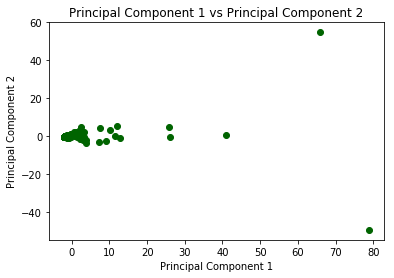

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=142)
principal_components = pca.fit_transform(df_scaled)
plt.scatter(principal_components[:,0] , principal_components[:,1],color = 'DarkGreen')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component 1 vs Principal Component 2')

#### b) Find the names of the six countries with the highest first component (these should be clear outliers).

In [25]:
first_component = principal_components[:,0]
highest_first_components = sorted(range(len(first_component)), key=lambda i: first_component[i])[-6:]
top_6_countries = df.index[highest_first_components].values
print('6 Countries with the highest first components are :', top_6_countries)

6 Countries with the highest first components are : ['Italy' 'Germany' 'Japan' 'Mexico' 'Canada' 'China']


#### c) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix). If you are using sklearn's PCA implementation, you may use the output attribute explained variance ratio.

i) Scree plot of proportion of variance

Text(0,0.5,'Proportion Variance Explained')

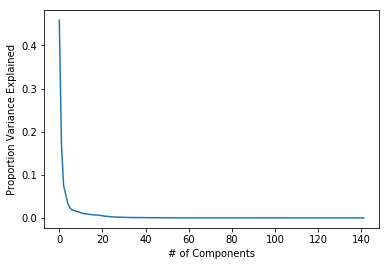

In [32]:
pca.fit(df_scaled)
pd.Series(pca.explained_variance_ratio_).plot()
plt.xlabel('# of Components')
plt.ylabel('Proportion Variance Explained')

ii) Cummulative proportion of variance

Text(0,0.5,'Cummulative Proportion Variance Explained')

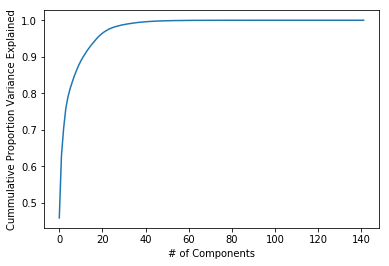

In [37]:
cum_variance_ratio = pd.Series(pca.explained_variance_ratio_).cumsum()
cum_variance_ratio.plot()
plt.xlabel('# of Components')
plt.ylabel('Cummulative Proportion Variance Explained')

#### d) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

In [43]:
index_where_cum_variance_30 = [ n for n,i in enumerate(cum_variance_ratio) if i>0.3 ][0]
index_where_cum_variance_60 = [ n for n,i in enumerate(cum_variance_ratio) if i>0.6 ][0]
index_where_cum_variance_90 = [ n for n,i in enumerate(cum_variance_ratio) if i>0.9 ][0]

pc_explaining_cum_variance_30 = index_where_cum_variance_30 + 1
pc_explaining_cum_variance_60 = index_where_cum_variance_60 + 1
pc_explaining_cum_variance_90 = index_where_cum_variance_90 + 1

print ('Principal components explaining cum. variance of 30% are', pc_explaining_cum_variance_30 )
print ('Principal components explaining cum. variance of 60% are', pc_explaining_cum_variance_60 )
print ('Principal components explaining cum. variance of 90% are', pc_explaining_cum_variance_90 )

Principal components explaining cum. variance of 30% are 1
Principal components explaining cum. variance of 60% are 2
Principal components explaining cum. variance of 90% are 13


# Question 5. PCA (conceptual) (10pts)

(a) (5pts) Give two reasons why we might want to use PCA.

(b) (5pts) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.

**a.)**

Below are the 2 reasons why we might want to use PCA - 

    1. In order to reduce the number of features in our data, especially when they are correlated with one another. We thus use PCA to transform the original variables to the linear combinations of the independent variables.
    2. PCA helps us reduce the number of low variance dimensions thus reducing the complexity of our model and requires less computational power

**b)**

Eigenvalue decomposition on the covariance matrix basicallly means fitting straight principal component lines to the variance and covariance of the data. Eigen vectors of the covariance matrix traces the lines (axes) of greatest variance and covariance of the data.

This is because when we perform linear tranformation on a matrix eigen vectors trace the lines of force it applies to the inputs of the matrix. Since the input of the covariance matrix are variance and co-variance, the eigen vectors basically represent the forces applied to variance and co-variance. One eigen vector is along the variance of the data (1st principal component) and the other eigen vector is along the perpendicular direction of the first eigen vector i.e. fitting the errors produced by the first eigen vector.

**Eigenvalues** are simply the magnitude of the 2 axes (eigen vectors). **They are the measure of data's covariance.**